In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [190]:
#učitavanje podataka
assessment = pd.read_csv("C:/Users/tamar/Documents/faks/diplomski/1_semestar/UZOP/anonymisedData/assessments.csv")
courses = pd.read_csv("C:/Users/tamar/Documents/faks/diplomski/1_semestar/UZOP/anonymisedData/courses.csv")
studentAssessment = pd.read_csv("C:/Users/tamar/Documents/faks/diplomski/1_semestar/UZOP/anonymisedData/studentAssessment.csv")
studentInfo = pd.read_csv("C:/Users/tamar/Documents/faks/diplomski/1_semestar/UZOP/anonymisedData/studentInfo.csv")
studentRegistration = pd.read_csv("C:/Users/tamar/Documents/faks/diplomski/1_semestar/UZOP/anonymisedData/studentRegistration.csv")
studentVle = pd.read_csv("C:/Users/tamar/Documents/faks/diplomski/1_semestar/UZOP/anonymisedData/studentVle.csv")
vle= pd.read_csv("C:/Users/tamar/Documents/faks/diplomski/1_semestar/UZOP/anonymisedData/vle.csv")

1. Student- activities
- uključuje tri baze: studentAssessment, studentRegistration i studentVle


In [191]:
studentAssessment.info()
studentAssessment.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


Mean: 75.7995729226023, Median: 80.0


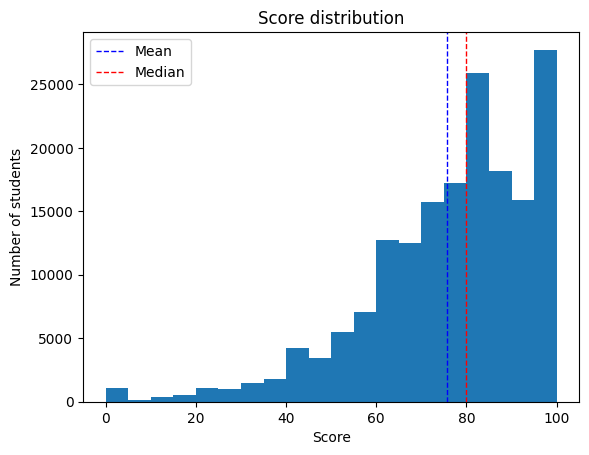

In [192]:
print('Mean: '+str(studentAssessment['score'].mean())+', Median: '+str(studentAssessment['score'].median()))
plt.hist(studentAssessment['score'], bins=20)
plt.xlabel('Score')
plt.ylabel('Number of students')
plt.title('Score distribution')
plt.axvline(studentAssessment['score'].mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(studentAssessment['score'].median(), color='r', linestyle='dashed', linewidth=1)
plt.legend({'Mean':studentAssessment['score'].mean(),'Median':studentAssessment['score'].median()})
plt.show()

Analiza grafa:
- graf naginje u desno -> veći dio studenata je dobio veliki broj bodova
- graf prati normalnu razdiobu
- srednja vrijednost je manja od medijana -> studenata koji nisu predali rad, odnosno dodijeljeno im je nula bodova, ima dovoljno da utječu na prosjek (visina prvog stupca)

In [193]:
studentRegistration.info()
studentRegistration.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


Mean: -69.4113002335013, Median: -57.0


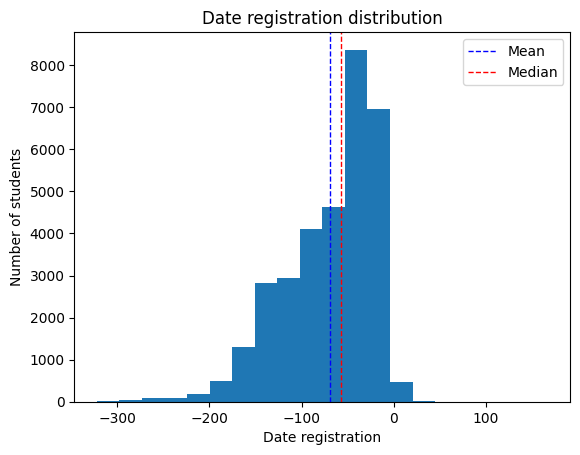

In [194]:
print('Mean: '+str(studentRegistration['date_registration'].mean())+', Median: '+str(studentRegistration['date_registration'].median()))
plt.hist(studentRegistration['date_registration'], bins=20)
plt.xlabel('Date registration')
plt.ylabel('Number of students')
plt.title('Date registration distribution')
plt.axvline(studentRegistration['date_registration'].mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(studentRegistration['date_registration'].median(), color='r', linestyle='dashed', linewidth=1)
plt.legend({'Mean':studentRegistration['date_registration'].mean(),'Median':studentRegistration['date_registration'].median()})
plt.show()

Analiza grafa:
- broj studenata registriranih u pojedinom danu kontinuirano raste prema 0 (početku predavanja)
- broj studenata nakon 0 se naglo smanjuje sa malim brojem prijava nakon početka

In [195]:
studentVle.info()
studentVle.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


2. Student - demographics
- tablica studentInfo sadrži osobne podatke studenta, po kojima možemo napraviti demografsku analizu svih polaznika

In [196]:
studentInfo.info()
studentInfo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


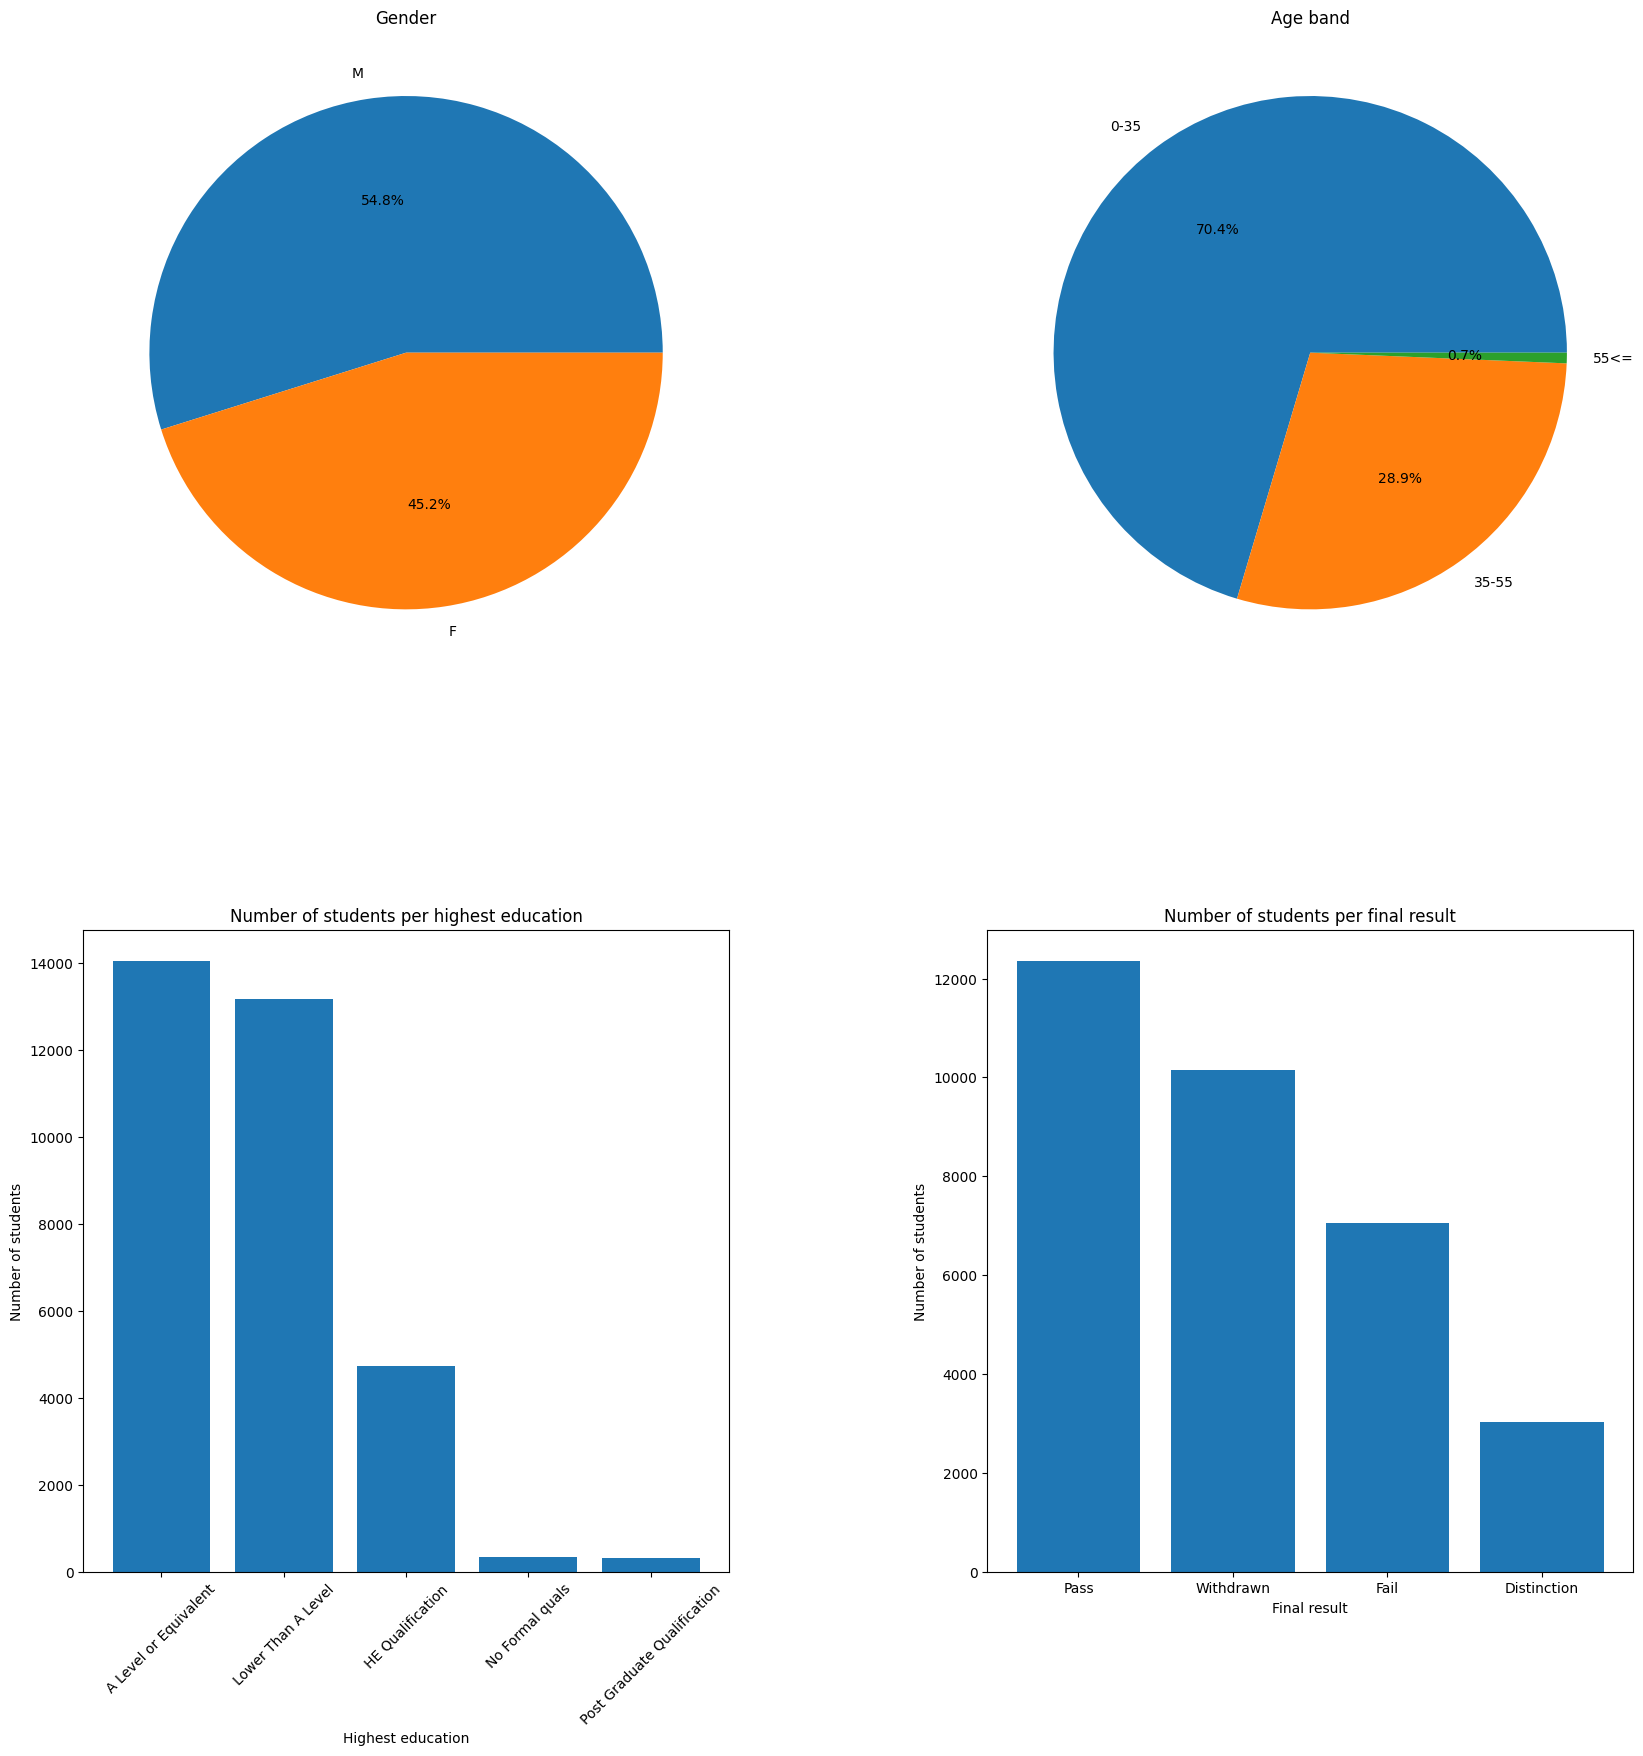

In [197]:
fig=plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax1=fig.add_subplot(2,2,1)
ax1.title.set_text('Gender')
le = LabelEncoder()
le.fit(studentInfo.loc[:,'gender'])
studentInfo.loc[:,'gender'] = le.transform(studentInfo.loc[:,'gender'])
studentInfo.head()
gender=studentInfo['gender'].value_counts()
plt.pie(gender, labels=['M', 'F'], autopct='%1.1f%%')

ax2=fig.add_subplot(2,2,2)
ax2.title.set_text('Age band')
le=LabelEncoder()
le.fit(studentInfo.loc[:,'age_band'])
studentInfo.loc[:,'age_band']=le.transform(studentInfo.loc[:,'age_band'])
plt.pie(studentInfo['age_band'].value_counts(), labels=['0-35', '35-55', '55<='], autopct='%1.1f%%')

ax3=fig.add_subplot(2,2,3)
ax3.title.set_text('Highest education')
studentInfo_education_ft = studentInfo['highest_education'].value_counts()

plt.bar(studentInfo_education_ft.index, studentInfo_education_ft)
plt.xticks(rotation=45)
plt.xlabel('Highest education')
plt.ylabel('Number of students')
plt.title('Number of students per highest education')

ax4=fig.add_subplot(2,2,4)
ax4.title.set_text('Final result')
studentInfo_final_result_ft = studentInfo['final_result'].value_counts()
plt.bar(studentInfo_final_result_ft.index, studentInfo_final_result_ft)

plt.xlabel('Final result')
plt.ylabel('Number of students')
plt.title('Number of students per final result')
plt.show()


3. Module presentation

In [198]:
assessment.info()
assessment.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [199]:
courses.info()
courses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [200]:
vle.info()
vle.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


### 2) Nedostajući podatci

In [201]:
studentAssessment.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [202]:
studentAssessment_temp = studentAssessment.dropna()


In [203]:
studentRegistration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [204]:
studentRegistration_temp = studentRegistration.dropna()

In [205]:
studentVle.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [206]:
studentInfo.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [207]:
assessment.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [208]:
assessment_temp = assessment.copy()
assessment_temp.loc[:,'date'] = assessment_temp.loc[:,'date'].mean()
assessment_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               206 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [209]:
courses.isna().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [210]:
vle.isna().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

### 3) Stršeći podatci

In [211]:
studentAssessment_temp.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173739.000000,1.737390e+05,173739.000000,173739.000000,173739.000000
mean,26555.615826,7.052474e+05,116.020226,0.010982,75.799573
std,8829.999907,5.524822e+05,71.479612,0.104218,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044660e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852220e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.345000e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


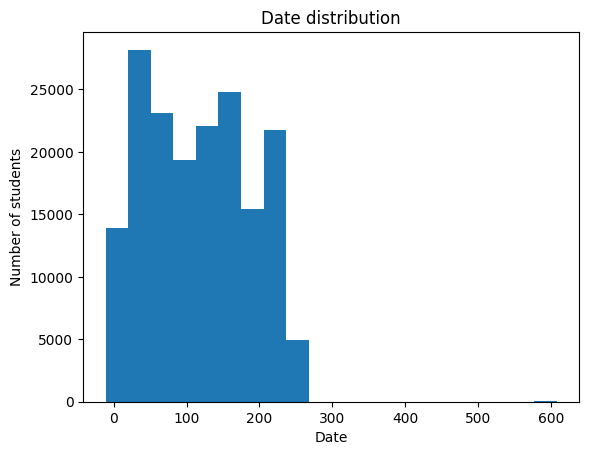

Date < 0 2055
Date > 100 96544
Date > 200 28818
Date > 300 66
Date > 400 50
Date > 500 30
Date > 600 5


In [212]:
plt.hist(studentAssessment_temp['date_submitted'], bins=20)
plt.xlabel('Date')
plt.ylabel('Number of students')
plt.title('Date distribution')
plt.show()

print('Date < 0', (studentAssessment_temp.date_submitted<0).sum())
print('Date > 100', (studentAssessment_temp.date_submitted>100).sum())
print('Date > 200', (studentAssessment_temp.date_submitted>200).sum())
print('Date > 300', (studentAssessment_temp.date_submitted>300).sum())
print('Date > 400', (studentAssessment_temp.date_submitted>400).sum())
print('Date > 500', (studentAssessment_temp.date_submitted>500).sum())
print('Date > 600', (studentAssessment_temp.date_submitted>600).sum())

In [213]:
studentRegistration_temp.describe()

,id_student,date_registration,date_unregistration
count,1.003300e+04,10033.000000,10033.000000
mean,7.086265e+05,-78.521379,50.276189
std,5.479573e+05,53.168107,82.028804
min,3.733000e+03,-322.000000,-317.000000
25%,5.099400e+05,-115.000000,-1.000000
50%,5.916500e+05,-67.000000,28.000000
75%,6.481300e+05,-32.000000,109.000000
max,2.698591e+06,167.000000,444.000000


In [214]:
studentVle.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


### Numeriranje vrijenosti

In [215]:
studentInfo_temp = studentInfo.copy()[['code_module', 'code_presentation', 'id_student', 'gender', 'highest_education', 'age_band', 'disability','num_of_prev_attempts', 'final_result']]
le = LabelEncoder()
le.fit(studentInfo_temp.loc[:,'gender'])
studentInfo_temp.loc[:,'gender'] = le.transform(studentInfo_temp.loc[:,'gender'])
le.fit(studentInfo_temp.loc[:,'age_band'])
studentInfo_temp.loc[:,'age_band'] = le.transform(studentInfo_temp.loc[:,'age_band'])
le.fit(studentInfo_temp.loc[:,'highest_education'])
studentInfo_temp.loc[:,'highest_education'] = le.transform(studentInfo_temp.loc[:,'highest_education'])
le.fit(studentInfo_temp.loc[:,'final_result'])
studentInfo_temp.loc[:,'final_result'] = le.transform(studentInfo_temp.loc[:,'final_result'])
le.fit(studentInfo_temp.loc[:,'code_module'])
studentInfo_temp.loc[:,'code_module'] = le.transform(studentInfo_temp.loc[:,'code_module'])
le.fit(studentInfo_temp.loc[:,'code_presentation'])
studentInfo_temp.loc[:,'code_presentation'] = le.transform(studentInfo_temp.loc[:,'code_presentation'])
le.fit(studentInfo_temp.loc[:,'disability'])
studentInfo_temp.loc[:,'disability'] = le.transform(studentInfo_temp.loc[:,'disability'])
studentInfo_temp.head()

,code_module,code_presentation,id_student,gender,highest_education,age_band,disability,num_of_prev_attempts,final_result
0,0,1,11391,1,1,2,0,0,2
1,0,1,28400,0,1,1,0,0,2
2,0,1,30268,0,0,1,1,0,3
3,0,1,31604,0,0,1,0,0,2
4,0,1,32885,0,2,0,0,0,2


## 4) Replikacija rezultata
### 1. Pearson chi-square

In [241]:
from scipy.stats import chi2_contingency

In [217]:
variables = ["highest_education", "age_band", "disability", "num_of_prev_attempts", "gender"]

for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            data_crosstab = pd.crosstab(studentInfo_temp[var1], studentInfo_temp[var2], margins = True, margins_name = "Total")
            stat, p, dof, expected=chi2_contingency(data_crosstab)
            print(var1+ " + "+var2+" : "+str(p))

highest_education + age_band : 1.768510411200312e-258
highest_education + disability : 9.156634818175677e-64
highest_education + num_of_prev_attempts : 0.008919524879113341
highest_education + gender : 7.133393916292653e-36
age_band + highest_education : 1.768510411200312e-258
age_band + disability : 2.0679358012655173e-05
age_band + num_of_prev_attempts : 0.7368630588795113
age_band + gender : 1.1671771142556095e-27
disability + highest_education : 9.156634818175677e-64
disability + age_band : 2.0679358012655173e-05
disability + num_of_prev_attempts : 1.3789388380314202e-15
disability + gender : 1.2341859581360784e-10
num_of_prev_attempts + highest_education : 0.008919524879113317
num_of_prev_attempts + age_band : 0.7368630588795113
num_of_prev_attempts + disability : 1.3789388380314202e-15
num_of_prev_attempts + gender : 0.0048284461778477445
gender + highest_education : 7.133393916292757e-36
gender + age_band : 1.1671771142556095e-27
gender + disability : 1.2341859581360784e-10
gend

In [235]:
#studentInfo+studentRegistration
df1=studentInfo.merge(studentRegistration_temp, on=['id_student', 'code_module', 'code_presentation'])
#df1.columns.values
df1_sel=df1.copy()[['code_module', 'id_student', 'code_presentation', 'final_result', 'highest_education', 'date_registration', 'age_band', 'disability', 'gender', 'num_of_prev_attempts']]
df1_sel.drop_duplicates(inplace=True)

#studentInfo+studentRegistration+studentVle
studentVle_tmp=studentVle.copy()[['id_student', 'code_module', 'code_presentation', 'sum_click']]
df2=df1_sel.merge(studentVle_tmp, on=['id_student', 'code_module', 'code_presentation'], how='right')
df2.drop_duplicates(inplace=True)

assessment_tmp=assessment.copy()
assessment_tmp2=assessment_tmp[['code_module', 'code_presentation', 'id_assessment']]
#assessment_tmp2.drop_duplicates(inplace=True)

df_assessment=studentAssessment_temp.merge(assessment_tmp2, on=['id_assessment'], how='right')
df_assessment=df_assessment[['code_module', 'code_presentation', 'id_student','score']]
df_assessment.drop_duplicates(inplace=True)

df3=df2.merge(df_assessment, on=['id_student', 'code_module', 'code_presentation'], how='right')

df3.drop_duplicates(inplace=True)


In [236]:
df3.info()
df3=df3.groupby('final_result')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3459742 entries, 0 to 3459741
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   code_module           object 
 1   id_student            float64
 2   code_presentation     object 
 3   final_result          object 
 4   highest_education     object 
 5   date_registration     float64
 6   age_band              object 
 7   disability            object 
 8   gender                object 
 9   num_of_prev_attempts  float64
 10  sum_click             float64
 11  score                 float64
dtypes: float64(5), object(7)
memory usage: 316.7+ MB
